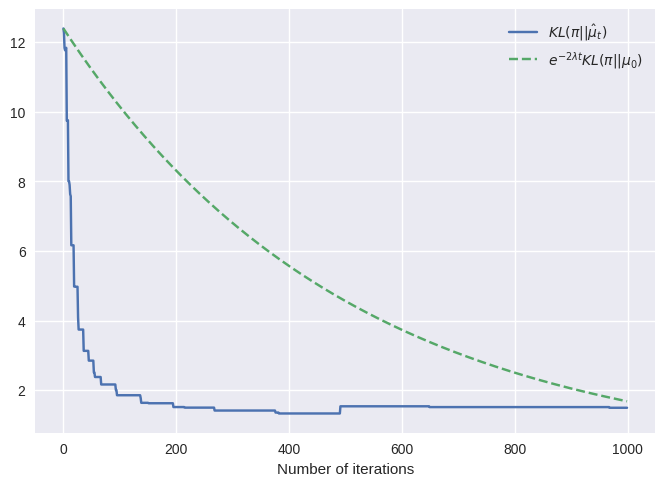

In [10]:
import numpy as np
import matplotlib.pyplot as plt

KL = np.load("KL.npy")
lamb = 0.001
exp_bounds = [np.exp(-2*lamb*t) * KL[0] for t in range(len(KL))]

plt.style.use("seaborn-v0_8")
plt.plot(KL, label="$KL(\pi||\hat{\mu}_t)$")
plt.plot(exp_bounds, "--", label="$e^{-2\lambda t}KL(\pi||\mu_0)$")
plt.xlabel("Number of iterations")
plt.legend()
plt.savefig("KL.pdf")

In [50]:
import torch

def somme(x, y):
  return 2*x + y

x = torch.rand(2, requires_grad=True)
x_ = x.clone()

res = torch.distributions.Normal(0, 1).log_prob(x)

def rbf(x, y, sigma=1.0):

  return torch.exp((x[:, None] - y[None, :])**2 / (2 * sigma**2))

res = torch.abs(x[:, None] - x_[None, :])

def id(x, y):
  return x[:, None] - y[None, :]

In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [52]:
id(x, x_)

tensor([[ 0.0000, -0.4998],
        [ 0.4998,  0.0000]], grad_fn=<SubBackward0>)

In [54]:
x

tensor([0.3274, 0.8271], requires_grad=True)

In [63]:
torch.func.jacfwd(rbf)(x, x_)

tensor([[[ 0.0000,  0.0000],
         [-0.5663, -0.0000]],

        [[ 0.0000,  0.5663],
         [ 0.0000,  0.0000]]], grad_fn=<ViewBackward0>)

In [39]:
torch.autograd.functional.jacobian(lambda x: rbf(x, x_), x).sum(dim=0).sum(dim=0)

tensor([ 3.0671,  1.3049, -2.0142,  0.1342, -2.4921])

In [15]:
import numpy as np
t = np.array([[0., 1.36389514], [1.36389514, 0.]])
np.median(t)

0.68194757

In [21]:

np.median(res.detach().numpy())

0.20127034

In [4]:
j = torch.autograd.functional.jacobian(lambda x: rbf(x, x_), x)

In [5]:
j

tensor([[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.2298,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.2351,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.9962,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.3536,  0.0000,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000, -0.2298,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0049,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.6057,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.1110,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000, -0.2351,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -0.0049,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.5986,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.1060,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000, -0.9962,  0.0000],
         [ 0.0000,  0.0000,  0.0000, -0.6057,  0.0000],
         [ 0.0000,  0.0000,  0.0000, -0.59

In [77]:
torch.sum(j, dim=1).sum(dim=1)

tensor([-0.5409,  1.7196, -3.3263,  1.0121,  1.1355])

In [89]:
x = torch.distributions.Normal(0, 1).
x.requires_grad = True
x

Real()

In [99]:
import numpy as np
def gm(probs, locs, scales):
  def logprob(x):
          
      # Dimension of x
      D = x.shape[-1]
      
      # Ensure MOG weight probabilities sum to 1
      log_probs = torch.log(probs[None, :] / torch.sum(probs))
      
      # Differences between x and gaussian locations
      diff = x[:, None] - locs[None, :]
      
      # Compute log of gaussian, including the normalising constant
      quad = -0.5 * torch.sum((diff / scales) ** 2, dim=1)
      quad = quad - 0.5 * D * torch.log(2 * np.pi * torch.prod(scales, dim=-1) ** 2)
      print(quad.shape)
      
      # Compute log-probability using the log-sum-exp trick for stability
      summands = log_probs + quad
      max_summand = torch.max(summands, axis=1)
      
      summed = torch.sum(torch.exp(summands - max_summand[:, None]), axis=1)
      summed = max_summand + torch.log(summed)
      
      return summed
  return logprob

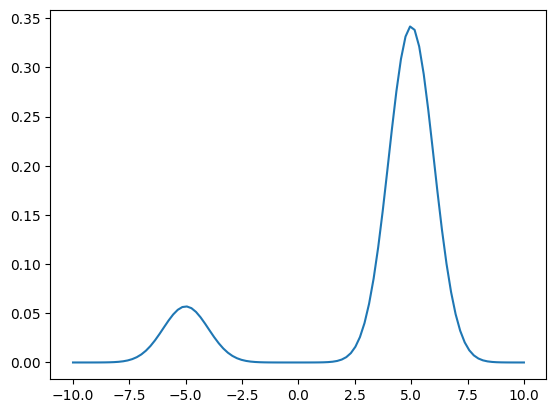

In [105]:
w = torch.distributions.Categorical(torch.tensor([1/2, 1/2]))
means = torch.tensor([-5, 5])
std = torch.tensor([1, 1])
mix = torch.distributions.MixtureSameFamily(w, torch.distributions.Normal(means, std))

x = torch.linspace(-10, 10, 100)
y = mix.log_prob(x)

import matplotlib.pyplot as plt
plt.plot(x, torch.exp(y))